In [1]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn import metrics

C:\Users\Frida\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.1.


# Import data


In [5]:
df_z = pd.read_parquet('../common/covid_cases_z_trans.parquet')

In [6]:
df_z.head(1)

,Algeria,Argentina,Australia,Austria,Bangladesh,Belarus,Belgium,Bolivia,Bulgaria,Canada,...,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vietnam,Zambia,Zimbabwe
2020-03-01,-1.016766,-0.704723,-1.314497,-2.128248,-0.974537,-1.38328,-2.021154,-0.852664,-0.982762,-1.692528,...,-1.677526,-0.777542,-0.977963,-1.334201,-1.82876,-1.206989,-1.733456,-1.337746,-0.739615,-0.683331


In [8]:
df_trans = df_z.T

In [9]:
df_array = df_trans.to_numpy()

In [10]:
df_array.shape

(89, 201)

# Clustering K-Shape with 4 clusters

In [11]:
seed = 0
np.random.seed(seed)

ks = KShape(n_clusters=4, n_init=5, verbose=True, random_state=seed)
y_pred = ks.fit_predict(df_array)

Init 1
0.001 --> 0.001 --> 0.001 --> 
Init 2
0.001 --> 0.001 --> 0.001 --> 
Init 3
0.002 --> 0.001 --> 0.001 --> 0.001 --> 
Init 4
0.002 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 
Init 5
0.002 --> 0.002 --> 0.001 --> 0.001 --> 0.001 --> 


In [12]:
ks.cluster_centers_.shape

(4, 201, 1)

In [14]:
a1=df_trans.loc[y_pred==0].transpose()
a2=df_trans.loc[y_pred==1].transpose()
a3=df_trans.loc[y_pred==2].transpose()
a4=df_trans.loc[y_pred==3].transpose()

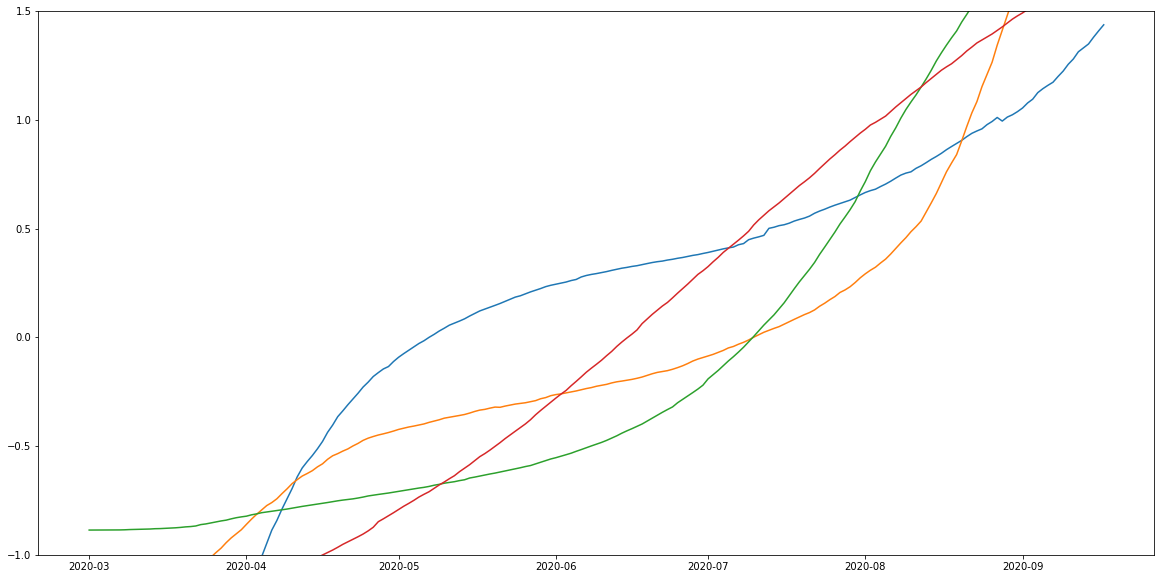

In [16]:
plt.figure(figsize=(20,10))
plt.plot(a1.mean(axis=1), label='')
plt.plot(a2.mean(axis=1), label='')
plt.plot(a3.mean(axis=1), label='')
plt.plot(a4.mean(axis=1), label='')
plt.ylim(-1, 1.5)
plt.show()

In [56]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [57]:
x_ks = df_z.T.iloc[:,:].values

In [58]:
label_ks = []
for idx in df_z.T.index:
    if idx in list(a1.columns):
        label_ks.append(1)
    elif idx in list(a2.columns):
        label_ks.append(2)
    elif idx in list(a3.columns):
        label_ks.append(3)
    elif idx in list(a4.columns):
        label_ks.append(4)
    else:
        print("ERROR: ", idx)

### *Silhouette score*

In [45]:
silhouette_score = silhouette_score(x_ks, labels=label_ks, metric='euclidean')

In [46]:
print("K-shape silhouette_score: ", silhouette_score)

K-shape silhouette_score:  0.332367733342148


### **davies_bouldin_score**

In [47]:
davies_bouldin_score = davies_bouldin_score(x_ks, labels=label_ks)

In [50]:
print("K-shape davies_bouldin_score: ", davies_bouldin_score)

K-shape davies_bouldin_score:  1.0216718723800384


### **calinski_harabasz_score**

In [59]:
calinski_harabasz_score = calinski_harabasz_score(x_ks, labels=label_ks)

In [60]:
print("K-shape calinski_harabasz_score: ", calinski_harabasz_score)

K-shape calinski_harabasz_score:  67.23604957204977
